# 单词和字符的one-hot编码

## 单词级

In [1]:
import numpy as np

In [2]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [3]:
# 构建数据中所有标记的索引

In [24]:
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10
results = np.zeros(shape=(len(samples), 
                          max_length, 
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [25]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

## 字符级的one-hot编码

In [27]:
import string

In [28]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [31]:
# 所有可打印的ASCII字符

In [32]:
characters = string.printable

In [33]:
characters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [34]:
token_index = dict(zip(range(1, len(characters) + 1), characters))

In [40]:
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
print(token_index.keys())  #  keys() 函数以列表返回一个字典所有的键
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])


In [41]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## 用Keras实现单词级的one-hot编码

In [42]:
from keras.preprocessing.text import Tokenizer

In [43]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [44]:
# 创建一个分词器(tokenizer), 设置为只考虑前1000个最常见的单词

In [45]:
tokenizer = Tokenizer(num_words=1000)

In [46]:
# 构建单词索引

In [47]:
tokenizer.fit_on_texts(texts=samples)

In [49]:
# 将字符串转换为整数索引组成的列表

In [50]:
sequences = tokenizer.texts_to_sequences(samples)

In [51]:
one_hot_results = tokenizer.texts_to_matrix(texts=samples, mode='binary')

In [52]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [53]:
# 找回单词索引

In [54]:
word_index = tokenizer.word_index

In [55]:
word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

In [56]:
print('Found {index} unique tokens.'.format(index=len(word_index)))

Found 9 unique tokens.


## 使用散列技巧的单词级one-hot编码

In [57]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [58]:
dimensionality = 1000
max_length = 10

In [63]:
results = np.zeros(shape=(len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [64]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

# 利用Embedding层学习词嵌入

## 加载IMDB数据，准备用于Embedding层

In [65]:
from keras.datasets import imdb
from keras import preprocessing

In [66]:
max_features = 10000  # 作为特征的单词个数

In [67]:
maxlen = 20  # 在maxlen后截断文本

In [68]:
# 将数据加载为整数列表

In [69]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [70]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

## 在IMDB数据上使用Embedding层和分类器

In [71]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [72]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [74]:
# validation_split：0~1之间的浮点数，用来指定训练集的一定比例数据作为验证集。验证集将不参与训练，并在每个epoch结束后测试的模型的指标，如损失函数、精确度等。

In [75]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s - loss: 0.6560 - acc: 0.6486 - val_loss: 0.5907 - val_acc: 0.7146
Epoch 2/10
20000/20000 [==============================] - 0s - loss: 0.5189 - acc: 0.7594 - val_loss: 0.5117 - val_acc: 0.7364
Epoch 3/10
20000/20000 [==============================] - 0s - loss: 0.4512 - acc: 0.7933 - val_loss: 0.4949 - val_acc: 0.7470
Epoch 4/10
20000/20000 [==============================] - 0s - loss: 0.4190 - acc: 0.8068 - val_loss: 0.4905 - val_acc: 0.7538
Epoch 5/10
20000/20000 [==============================] - 1s - loss: 0.3965 - acc: 0.8197 - val_loss: 0.4914 - val_acc: 0.7572
Epoch 6/10
20000/20000 [==============================] - 0s - loss: 0.3784 - acc: 0.8311 - val_loss: 0.4953 - val_acc: 0.7592
Epoch 7/10
20000/20000 [==============================] - 1s - loss: 0.3624 - acc: 0.8419 - val_loss: 0.5004 - val_acc: 0.7574
Epoch 8/10
20000/20000 [==============================] - 1s -

# 使用预训练的词嵌入

## 处理IMDB原始数据的标签

In [1]:
import os

In [2]:
imdb_dir = r'E:\Data\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

In [40]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            # 'cp950' error需在open中加入(encoding='utf-8-sig')
            f = open(os.path.join(dir_name, fname), encoding='utf-8-sig')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [41]:
texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [42]:
labels[0]

0

## 对原始数据的文本进行分词

In [43]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [44]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [45]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [46]:
word_index = tokenizer.word_index
print('Found {word} unique tokens.'.format(word=len(word_index)))

Found 88582 unique tokens.


In [48]:
data = pad_sequences(sequences, maxlen)

In [49]:
labels = np.asarray(labels)

In [50]:
print('Shape of data tensor: {shape}'.format(shape=data.shape))
print('Shape of label tensor: {shape}'.format(shape=labels.shape))

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [51]:
indices = np.arange(data.shape[0])

In [53]:
np.random.shuffle(indices)

In [54]:
data = data[indices]
labels = labels[indices]

In [55]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

## 解析GloVe词嵌入文件

In [56]:
glove_dir = r'E:\Data\glove.6B'

In [57]:
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8-sig')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [58]:
print('Found {num} word vectors'.format(num=len(embeddings_index)))

Found 400000 word vectors


## 构建一个可以加载到Embedding层中的GloVe词嵌入矩阵

In [84]:
embedding_dim = 100

In [85]:
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 在嵌入索引(embeddings_index)找不到的词，其嵌入向量全为0
            embedding_matrix[i] = embedding_vector

## 定义模型

In [86]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [87]:
model_glove = Sequential()
model_glove.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_glove.add(Flatten())
model_glove.add(Dense(units=32, activation='relu'))
model_glove.add(Dense(units=1, activation='sigmoid'))

In [88]:
model_glove.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## 将预训练的词嵌入矩阵加载到Embedding层中

In [89]:
# 将准备好的GloVe矩阵加载到Embedding层中，即模型的第一层

In [90]:
model_glove.layers[0].set_weights([embedding_matrix])
model_glove.layers[0].trainable = False  # 冻结Embedding层

## 训练与评估

In [91]:
model_glove.compile(optimizer='rmsprop', loss='binary_crossentropy' , metrics=['acc'])

In [92]:
history = model_glove.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s - loss: 0.9527 - acc: 0.5800 - val_loss: 0.9811 - val_acc: 0.4983
Epoch 2/10
200/200 [==============================] - 0s - loss: 0.6180 - acc: 0.6650 - val_loss: 0.9513 - val_acc: 0.4983
Epoch 3/10
200/200 [==============================] - 0s - loss: 0.5258 - acc: 0.7250 - val_loss: 0.7919 - val_acc: 0.5173
Epoch 4/10
200/200 [==============================] - 0s - loss: 0.3667 - acc: 0.8500 - val_loss: 0.9432 - val_acc: 0.5001
Epoch 5/10
200/200 [==============================] - 0s - loss: 0.3537 - acc: 0.8600 - val_loss: 0.7501 - val_acc: 0.5384
Epoch 6/10
200/200 [==============================] - 0s - loss: 0.1950 - acc: 1.0000 - val_loss: 0.7210 - val_acc: 0.5556
Epoch 7/10
200/200 [==============================] - 0s - loss: 0.2120 - acc: 0.9350 - val_loss: 0.7072 - val_acc: 0.5662
Epoch 8/10
200/200 [==============================] - 0s - loss: 0.1043 - acc: 1.0000 - val

In [93]:
# 保存模型

In [94]:
model_glove.save('pre_trained_glove_model.h5')

## 绘制结果

In [95]:
import matplotlib.pyplot as plt

In [96]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [97]:
epochs = range(1, len(acc) + 1)

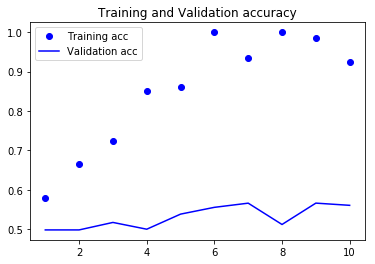

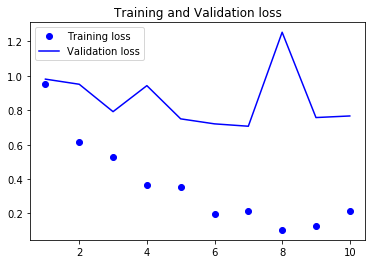

In [98]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# 不使用预训练词向量的情况下训练相同的模型

## 训练

In [99]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [100]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [102]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s - loss: 0.6834 - acc: 0.5800 - val_loss: 0.6954 - val_acc: 0.5222
Epoch 2/10
200/200 [==============================] - 0s - loss: 0.4474 - acc: 0.9600 - val_loss: 0.6948 - val_acc: 0.5327
Epoch 3/10
200/200 [==============================] - 1s - loss: 0.2261 - acc: 1.0000 - val_loss: 0.7139 - val_acc: 0.5347
Epoch 4/10
200/200 [==============================] - 0s - loss: 0.0946 - acc: 1.0000 - val_loss: 0.7140 - val_acc: 0.5413
Epoch 5/10
200/200 [==============================] - 0s - loss: 0.0438 - acc: 1.0000 - val_loss: 0.7393 - val_acc: 0.5364
Epoch 6/10
200/200 [==============================] - 0s - loss: 0.0227 - acc: 1.0000 - val_loss: 0.7475 - val_acc: 0.5365
Epoch 7/10
200/200 [==============================] - 1s - loss: 0.0126 - acc: 1.0000 - val_loss: 0.7685 - val_acc: 0.5360
Epoch 8/10
200/200 [==============================] - 0s - loss: 0.0074 - acc: 1.0000 - val

In [103]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [104]:
epochs = range(1, len(acc) + 1)

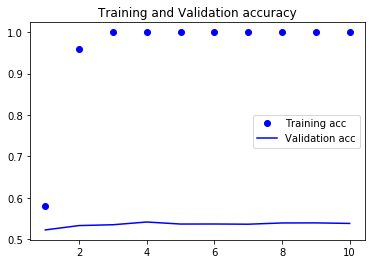

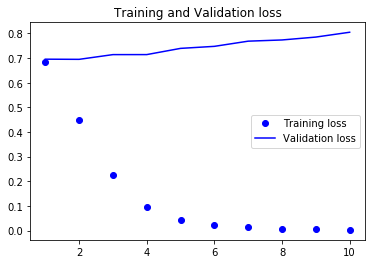

In [105]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

## 对测试集数据进行分词

In [107]:
test_dir = os.path.join(imdb_dir, 'test')

In [113]:
labels = []
texts = []

In [114]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8-sig')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [115]:
sequences = tokenizer.texts_to_sequences(texts=texts)

In [116]:
x_test = pad_sequences(sequences=sequences, maxlen=maxlen)
y_test = np.asarray(labels)

## 在测试集上评估模型

In [117]:
model.load_weights('./pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)  # 返回损失值和选定的指标值

24992/25000 [============================>.] - ETA: 0s

[0.7790526987457276, 0.55332]